In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv/data.csv",index_col='id')

In [3]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [5]:
data = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [6]:
data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,...,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,...,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,...,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,...,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,...,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


In [7]:
neighbours = NearestNeighbors(n_neighbors=58)
neighbours_fit = neighbours.fit(data)
dist,index = neighbours_fit.kneighbors(data)

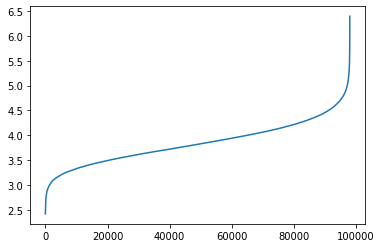

In [8]:
dist = np.sort(dist,axis=0)
dist = dist[:,1]
plt.plot(dist)

In [9]:
db = DBSCAN(eps=4.5 , min_samples=58,algorithm="kd_tree")
db.fit(data)
y = db.labels_

In [10]:
n_clusters = len(set(y)) - (1 if -1 in y else 0)
n_noise = list(y).count(-1)

In [11]:
n_clusters,n_noise

(1, 11371)

In [54]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)